<a href="https://colab.research.google.com/github/mariapaulav03/Adopciones-Awicha/blob/main/Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title PROYECTO

In [2]:
#@markdown Settings plot <img src="https://cdn.pixabay.com/animation/2023/03/19/15/09/15-09-56-389_512.gif" width="20px">

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import symbols, lambdify
from tabulate import tabulate

plt.style.use('dark_background')

In [18]:

def equation(ecuacion_str):
  x_symbol = symbols('x')
  x_func = lambdify(x_symbol, ecuacion_str, 'numpy')
  return x_func


In [24]:
def secant(fun, a, b, tol, steps):
  i= 0
  er = 1
  data = []
  while er > tol:
        tempa = a
        tempb = b
        a = b - (fun(b)) / ((fun(a) - fun(b)) / (a - b))
        b = tempa
        er = abs((a - b) / a)

        row = [i, tempa, fun(tempa), tempb, fun(tempb), a, er]
        data.append(row)
        i += 1

        plt.scatter(a, fun(a), color='green', marker="*")
        if(er<tol):
          return {'fila': data, 'valor': a}

#def func(x):
  #return math.sin(x)

#print(secant(func, 2, 4, 0.0001, 10, 1000000))

In [29]:
def runSecant(x_func, x0, x1, tolerancia):
  headers = ["Iteración", "Xn-1", "f(Xn-1)", "Xn-2", "f(Xn-2)", "Xn", "Error relativo"]
  func1 = secant(x_func, x0, x1, tolerancia, 10)

  print("\n Resultados:")
  print(tabulate(func1['fila'], headers=headers, floatfmt=(".0f", ".6f", ".6f", ".6f", ".6f", ".6f", ".6f"), tablefmt="grid"))


  graphX = np.linspace(x0 - 3, x0 + 3, 100)
  graphY = x_func(graphX)

  plt.plot(graphX, graphY)
  #plt.ylim(min(graphY) - 3, max(graphY) + 3)
  plt.ylim(1, -1)
  plt.xlim(2, 3.5)
  plt.scatter(x1, 0, color='red')
  plt.grid(False)
  plt.axhline(y=0, color='gray', linestyle='--', label='y = 0')
  plt.show()
  print("Solución",func1['valor'])



 Resultados:
+-------------+----------+-----------+----------+-----------+----------+------------------+
|   Iteración |     Xn-1 |   f(Xn-1) |     Xn-2 |   f(Xn-2) |       Xn |   Error relativo |
+=============+==========+===========+==========+===========+==========+==================+
|           0 | 2.000000 |  0.909297 | 4.000000 | -0.756802 | 3.091528 |         0.353071 |
+-------------+----------+-----------+----------+-----------+----------+------------------+
|           1 | 3.091528 |  0.050044 | 2.000000 |  0.909297 | 3.155100 |         0.020149 |
+-------------+----------+-----------+----------+-----------+----------+------------------+
|           2 | 3.155100 | -0.013507 | 3.091528 |  0.050044 | 3.141589 |         0.004301 |
+-------------+----------+-----------+----------+-----------+----------+------------------+
|           3 | 3.141589 |  0.000004 | 3.155100 | -0.013507 | 3.141593 |         0.000001 |
+-------------+----------+-----------+----------+-----------+-----

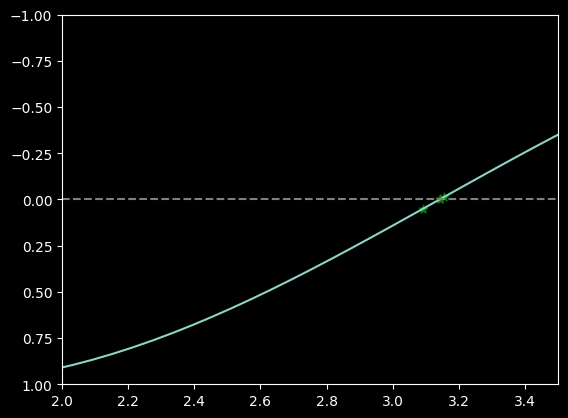

Solución 3.1415926537150614


In [30]:

ecuacion_str = 'sin(x)'#@param {type:'string'}
x_func = equation(ecuacion_str)

x0 = 2#@param {type:'number'}
x1 = 4#@param {type:'number'}

tolerancia = 0.0001#@param {type:'number'}
selectMethod= "secante" #@param ["bisection","newton","secante"]

if(selectMethod == "secante" ):
  runSecant(x_func, x0, x1, tolerancia)